In [1]:
import pandas as pd
import pyodbc

In [16]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=LAPTOP-TE7FGJV9\SQLEXPRESS;'
                      'Database=tfmFinal;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()


In [17]:
#Función para anoni,ización de datos
def encode_df(df,col_name):
    keys={cats: i for i,cats in enumerate(df[col_name].unique())}
    df[col_name]=df[col_name].apply(lambda x: keys[x])
    return df

In [19]:

ventas=pd.read_sql_query('SELECT * FROM dbo.Ventas',conn)
ventas=encode_df(ventas,'Nombre')
ventas.head()

,NombreTrans,CodTrans,NumTrans,FechaTrans,Nombre,Direccion,Pais,Provincia,Canton,Parroquia,CodInventario,Descripcion,PrecioUnitario,Cantidad,PrecioTotal
0,FACTURA ELECTRONICA C,FCEC,17577.0,2021-01-13 00:00:00,0,PUYO,ECUADOR,Pastaza,Pastaza,Puyo,C2691606960-2,TAPA CORONA 26 PRY-OFF DORADA (FUNDA X 200 UN.),2.00,2.0,4.00
1,FACTURA ELECTRONICA C,FCEC,17577.0,2021-01-13 00:00:00,0,PUYO,ECUADOR,Pastaza,Pastaza,Puyo,C2691606960-2,TAPA CORONA 26 PRY-OFF DORADA (FUNDA X 200 UN.),2.00,2.0,4.00
2,FACTURA ELECTRONICA C,FCEC,17577.0,2021-01-13 00:00:00,0,PUYO,ECUADOR,Pastaza,Pastaza,Puyo,C2691606960U,TAPA CORONA 26 PRY-OFF DORADA (UNIDADES),0.01,5.0,0.05
3,FACTURA ELECTRONICA C,FCEC,17577.0,2021-01-13 00:00:00,0,PUYO,ECUADOR,Pastaza,Pastaza,Puyo,C2691606960U,TAPA CORONA 26 PRY-OFF DORADA (UNIDADES),0.01,5.0,0.05
4,FACTURA ELECTRONICA C,FCEC,17578.0,2021-01-13 00:00:00,1,DE LA BANDERA NACIONAL Y CALLE DEL HIMNO ESQUINA,ECUADOR,Azuay,Cuenca,El Sagrario,12016014-1,300 ML. S-BOTL CORONA AMBAR (CAJA X 35),8.11,14.0,113.54


In [20]:
ventas.groupby('Descripcion')['Cantidad'].mean().sort_values(ascending=False).head()

Descripcion
TAPA TIPO VALVULA DORADA COCO LOCO (UNIDADES)                        3880.000000
TAPON SALSA SEMIPERFORADO  UNIDAD                                    1413.142857
31.5 MM TAPA ALUMINIO DOSIFICADOR PLASTICO COLOR NEGRO (UNIDADES)    1235.111111
TAPON  INTERNO 19.5                                                  1025.000000
750 ML. S-BOTL ROUND AGUARDIENTE TRANS. FLINT (UNIDAD)                988.272727
Name: Cantidad, dtype: float64

In [21]:
ventas.groupby('Descripcion')['Cantidad'].count().sort_values(ascending=False).head()

Descripcion
63 MM. TAPA TWIST-OFF BOTON DORADA (FUNDA X 24)      1628
250 ML. S-JAR ROUND (CAJA X 24 UN.)                  1393
38 MM. TAPA TWIST-OFF BOTON DORADA (UNIDAD)          1363
38 MM. TAPA TWIST-OFF BOTON NEGRA (UNIDADES)         1290
82 MM. TAPA TWIST-OFF BOTON DORADA (FUNDA X 24 U)    1145
Name: Cantidad, dtype: int64

In [22]:
ratings_mean_count = pd.DataFrame(ventas.groupby('Descripcion')['Cantidad'].mean())

In [23]:
ratings_mean_count['rating_counts'] = pd.DataFrame(ventas.groupby('Descripcion')['Cantidad'].count())

In [24]:
ratings_mean_count.head()

,Cantidad,rating_counts
Descripcion,,
100 ML. S-BOTL HOT SAUCE AJI (CAJA X 24 UN),4.478261,23
100 ML. S-BOTL HOT SAUCE AJI (UNIDADES),7.000000,5
100 MM. TAPA TWIST-OFF REGULAR DORADA (FUNDA X 12 UN),2.222222,9
100 MM. TAPA TWIST-OFF REGULAR DORADA (UNIDADES),4.800000,5
1000 ML. FRASCO B/A (BANDEJA X 18),2.355649,239


<AxesSubplot:title={'center':'Número de veces que un producto ha sido comprado por un cliente'}>

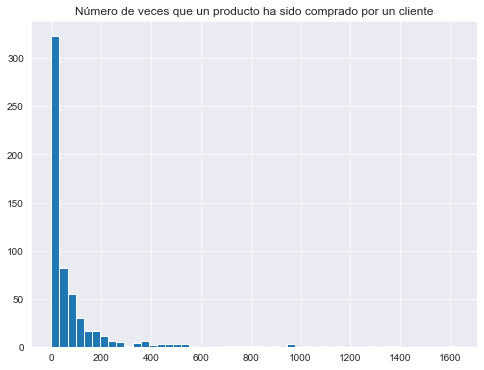

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.title('Número de veces que un producto ha sido comprado por un cliente')
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<AxesSubplot:>

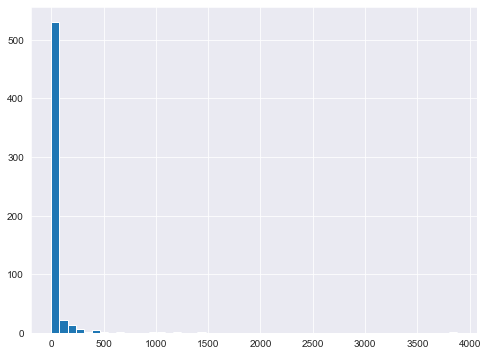

In [11]:
plt.figure(figsize=(8,6))
#plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Cantidad'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

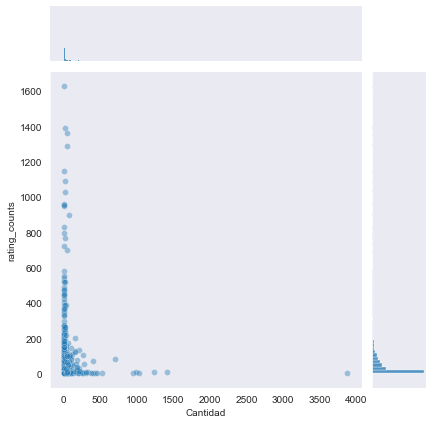

In [12]:
plt.figure(figsize=(8,6))
#plt.title('Cantidad de productos comprados y número de clientes que los han comprando')
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Cantidad', y='rating_counts', data=ratings_mean_count, alpha=0.4)


Recomendaciones de productos similares

In [25]:
user_item_rating = ventas.pivot_table(index='Nombre', columns='Descripcion', values='Cantidad')

In [26]:
user_item_rating = user_item_rating.fillna(0)

In [27]:
user_item_rating.head(20)

Descripcion,100 ML. S-BOTL HOT SAUCE AJI (CAJA X 24 UN),100 ML. S-BOTL HOT SAUCE AJI (UNIDADES),100 MM. TAPA TWIST-OFF REGULAR DORADA (FUNDA X 12 UN),100 MM. TAPA TWIST-OFF REGULAR DORADA (UNIDADES),1000 ML. FRASCO B/A (BANDEJA X 18),1000 ML. FRASCO B/A (UNIDAD),1000 ML. S-BOTL JUGO IMP. (CAJA X 12),1000 ML. S-BOTL JUGO IMP. (CAJA X 42),1000 ML. S-BOTL JUGO IMP. (UNIDAD),1000 ML. S-BOTL JUGO STOCK (CAJA X 12),...,"TAPON MM 30,0X11,0/21,0 DORADO&BEIGE OIL",TAPON SALSA SEMIPERFORADO UNIDAD,TAPON SALSA UNIDADES,TAPON SALSERO INTERNO PERFORADO # 20,TAPON SALSERO INTERNO PERFORADO #2,"TAPON TD 29,0X10,0/19,5 ROBLE NEGRO&BEIGE","TAPON TW 29,0X12,0/19,5 ROBLE NATURAL/MADERA","TAPON TW 34,0X12,0/22,5 ROBLE OSCURO CORTO KALEIDO 750","TAPON TW 37,0X18,0/22,5 ROBLE OSCURO KALEIDO 750",VALVULAS NEGRAS (UNIDAD)
Nombre,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [28]:
ratings_mean_count.sort_values('rating_counts', ascending=False).head(10)

,Cantidad,rating_counts
Descripcion,,
63 MM. TAPA TWIST-OFF BOTON DORADA (FUNDA X 24),4.549754,1628
250 ML. S-JAR ROUND (CAJA X 24 UN.),10.935391,1393
38 MM. TAPA TWIST-OFF BOTON DORADA (UNIDAD),49.039618,1363
38 MM. TAPA TWIST-OFF BOTON NEGRA (UNIDADES),40.034884,1290
82 MM. TAPA TWIST-OFF BOTON DORADA (FUNDA X 24 U),4.846288,1145
500 ML S-JAR ROUND B/A (CAJA X 24 UN),10.245872,1090
58 MM. TAPA TWIST-OFF BOTON DORADA (FUNDA X 24),10.125609,1027
145 ML. S-JAR ROUND (CAJA X 24 UN),4.625780,962
260 ML. S-JAR ROUND (CAJA X 24 UN),5.174869,955


EJEMPLO

In [29]:
redondo_ratings = user_item_rating['370 ML. S-JAR FOOD (CAJA X 24 UN.)']

In [30]:
redondo_ratings.head()

Nombre
0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: 370 ML. S-JAR FOOD (CAJA X 24 UN.), dtype: float64

In [31]:
item_like_redondo_402=user_item_rating.corrwith(redondo_ratings)

corr_redondo = pd.DataFrame(item_like_redondo_402, columns=['Correlation'])
corr_redondo.dropna(inplace=True)
corr_redondo.head()

,Correlation
Descripcion,
100 ML. S-BOTL HOT SAUCE AJI (CAJA X 24 UN),0.001051
100 ML. S-BOTL HOT SAUCE AJI (UNIDADES),0.017099
100 MM. TAPA TWIST-OFF REGULAR DORADA (FUNDA X 12 UN),0.004946
100 MM. TAPA TWIST-OFF REGULAR DORADA (UNIDADES),-0.002070
1000 ML. FRASCO B/A (BANDEJA X 18),0.042610


In [32]:
corr_redondo.sort_values('Correlation', ascending=False).head(5)

,Correlation
Descripcion,
370 ML. S-JAR FOOD (CAJA X 24 UN.),1.000000
400 ML. S-BOTL ROUND JUGO (BANDEJA X 36),0.440711
500 ML. S-JAR REDONDO CONSERVAS (CAJA X 24),0.389964
63 MM. TAPA TWIST-OFF REGULAR MANTEL VERDE (FUNDA X 24 UN,0.323170
63 MM. TAPA TWIST-OFF REGULAR PLATA (FUNDA X 24 UN),0.308336


In [33]:
corr_redondo = corr_redondo.join(ratings_mean_count['rating_counts'])
corr_redondo.head()

,Correlation,rating_counts
Descripcion,,
100 ML. S-BOTL HOT SAUCE AJI (CAJA X 24 UN),0.001051,23
100 ML. S-BOTL HOT SAUCE AJI (UNIDADES),0.017099,5
100 MM. TAPA TWIST-OFF REGULAR DORADA (FUNDA X 12 UN),0.004946,9
100 MM. TAPA TWIST-OFF REGULAR DORADA (UNIDADES),-0.002070,5
1000 ML. FRASCO B/A (BANDEJA X 18),0.042610,239


In [42]:
corr_redondo[corr_redondo ['rating_counts']>100].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
Descripcion,,
370 ML. S-JAR FOOD (CAJA X 24 UN.),1.000000,201
500 ML. S-JAR REDONDO CONSERVAS (CAJA X 24),0.389964,135
63 MM. TAPA TWIST-OFF REGULAR MANTEL VERDE (FUNDA X 24 UN,0.323170,188
63 MM. TAPA TWIST-OFF REGULAR PLATA (FUNDA X 24 UN),0.308336,330
63 MM. TAPA TWIST-OFF ESTIBABLE BOTON NEGRA (FUNDA X 24 UN),0.245004,720
